# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mnist = io.loadmat('/content/drive/MyDrive/Tobigs/Week4/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

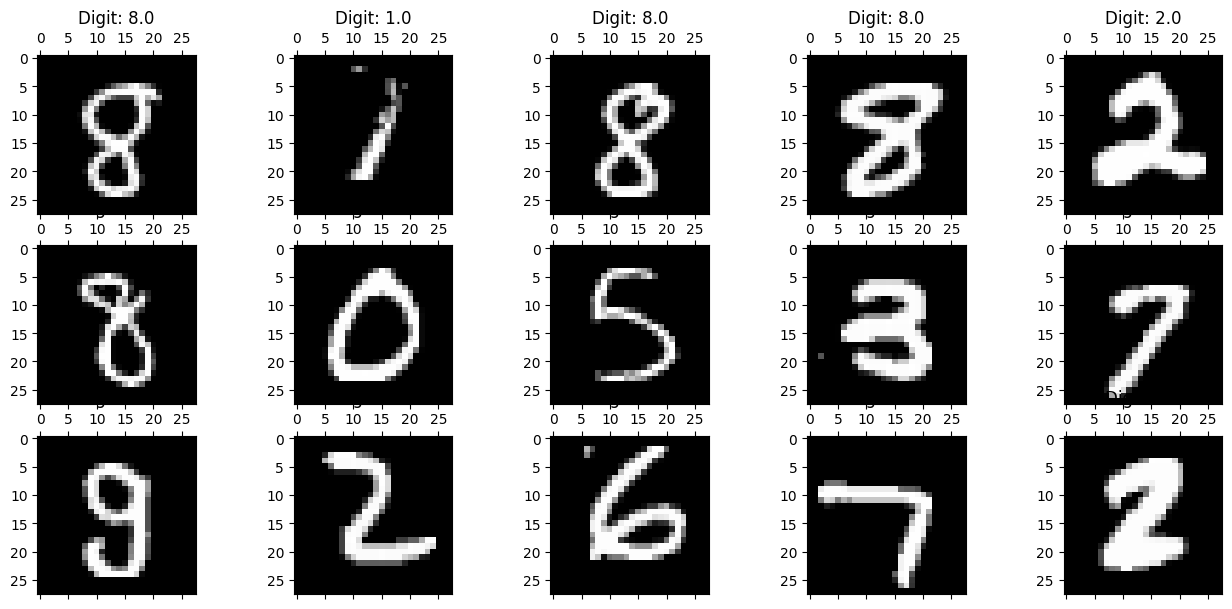

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000, 1), (14000, 1))

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [12]:
from sklearn.decomposition import PCA

### 2)-1 누적설명률 이용

In [13]:
pca = PCA()
pca.fit(X_train_std)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.85) + 1
d

183

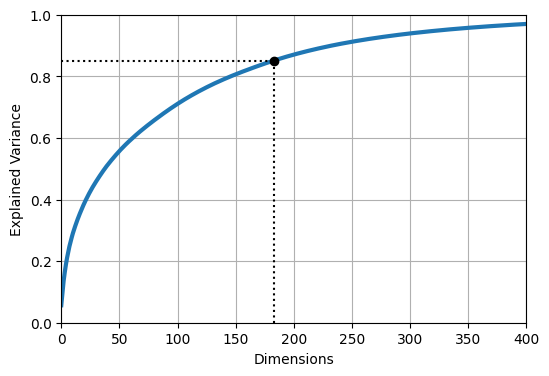

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)

plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.plot(d, 0.85, "ko")
plt.plot([d, d], [0, 0.85], "k:")
plt.plot([0, d], [0.85, 0.85], "k:")

plt.grid(True)
plt.show()

### 2)-2 Elbow point 이용

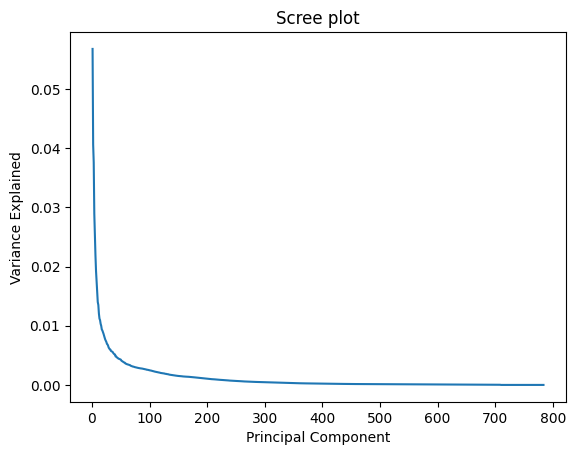

In [15]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_)
plt.title('Scree plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

elbow point를 국소적으로 살펴보기 위해 0부터 100까지 범위를 좁혀서 Scree plot을 살펴보겠다.

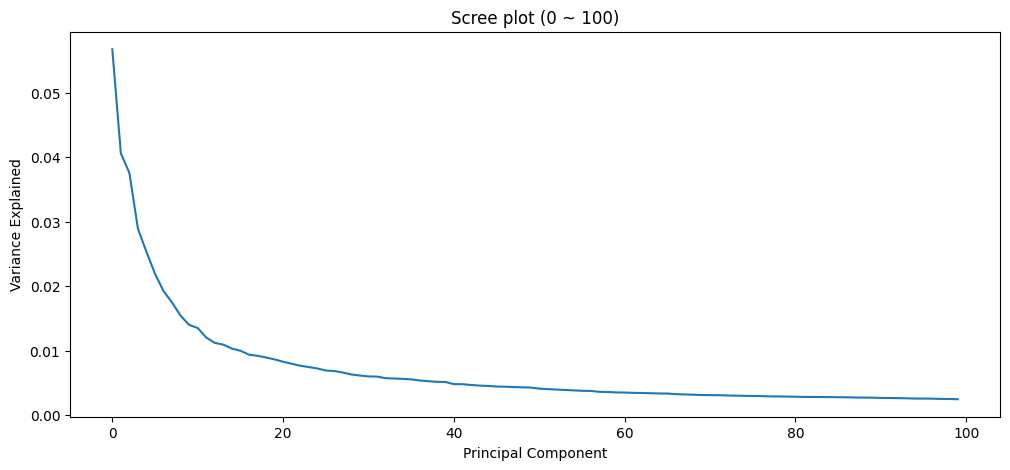

In [16]:
PC_values = np.arange(100)
plt.figure(figsize=(12,5))
plt.plot(PC_values, pca.explained_variance_ratio_[0:100])
plt.title('Scree plot (0 ~ 100)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

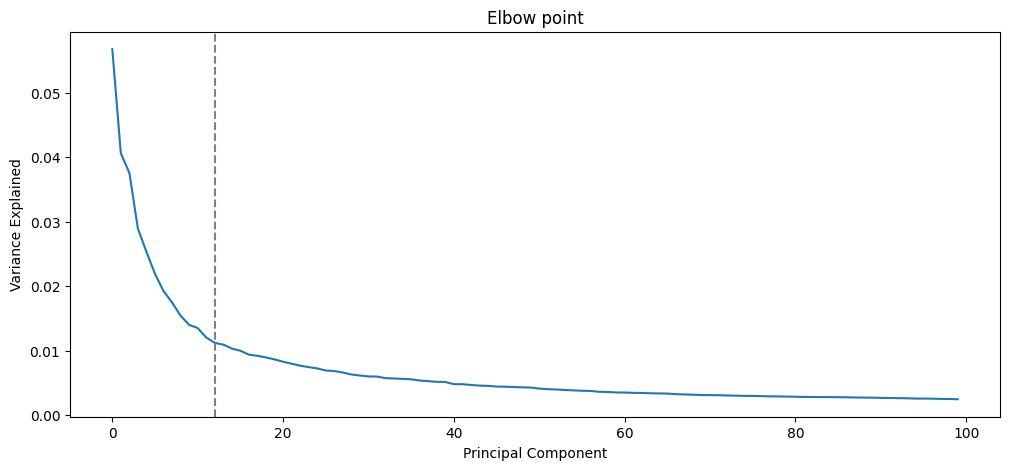

In [17]:
PC_values = np.arange(100)

plt.figure(figsize=(12,5))

plt.plot(PC_values, pca.explained_variance_ratio_[0:100])

plt.title('Elbow point')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.axvline(12, ls='--', color='grey')

plt.show()

Elbow point를 휴리스틱으로 정했을 때 곡선의 기울기가 급격히 감소하는 지점은 Principal Component가 12일때로 볼 수 있겠다.

###2)-3 Kaiser's Rule 이용

In [18]:
cov = np.cov(X_train.T)

eigen_values, eigen_vectors = lin.eig(cov)

num_of_kaiser_values = len(eigen_values[eigen_values >= 1])

print(num_of_kaiser_values)

650


Kaiser's Rule을 따져봤을 때 고유값이 1 이상인 주성분의 개수는 650개이다. 기존 mnist column의 개수가 784개이므로 차원 축소가 세 가지의 기법중 제일 적게 되었다.

2)-1, 2, 3 의 세 가지 주성분 개수 결정 방법을 비교했을 때, 누적설명률을 이용한 주성분 결정 방법이 가장 적절하다고 판단하였다. 따라서 PCA를 진행하는 주성분의 수는 누적설명률이 90%를 찍는 87개를 이용할 것이다.

In [19]:
pca = PCA(n_components=183)
pca.fit(X_train_std)

pca_X_train = pca.transform(X_train_std)
pca_X_test = pca.transform(X_test_std)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)

lda_X_train = lda.transform(X_train_std)
lda_X_test = lda.transform(X_test_std)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

특정한 틀 없이 자유롭게 해주시면 됩니다!

In [21]:
import time

### 3)-1. RandomForest

원본 데이터

In [22]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier()

start = time.time()

RFclf.fit(X_train_std, y_train)

end = time.time()

print("학습에 소요된 시간 : ", (end-start))

<ipython-input-22-38b2ef5ac9b7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclf.fit(X_train_std, y_train)


학습에 소요된 시간 :  49.52405381202698


In [23]:
RFclf.score(X_test_std, y_test)

0.9692142857142857

PCA 진행한 데이터

In [24]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier()

start = time.time()

RFclf.fit(pca_X_train, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

<ipython-input-24-a19dc087bb33>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclf.fit(pca_X_train, y_train)


학습에 소요된 시간 :  138.97614812850952


In [25]:
RFclf.score(pca_X_test, y_test)

0.9418571428571428

LDA 진행한 데이터

In [26]:
RFclf = RandomForestClassifier()

start = time.time()

RFclf.fit(lda_X_train, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

<ipython-input-26-fcc3adc78a50>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclf.fit(lda_X_train, y_train)


학습에 소요된 시간 :  34.43637013435364


In [27]:
RFclf.score(lda_X_test, y_test)

0.9155714285714286

RandomForest를 이용한 분류 예측은 \

* 학습 시간 : PCA > 원본 > LDA \
* 성능(accuracy score) : 원본 > PCA > LDA \
순으로 나타났다.

### 3)-2. LogisticClassifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

* 원본 데이터

In [29]:
LRclf = LogisticRegression()

In [30]:
start = time.time()

LRclf.fit(X_train_std, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습에 소요된 시간 :  43.377031564712524


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
pred = LRclf.predict(X_test_std)
print(accuracy_score(pred, y_test))

0.9166428571428571


* PCA 적용한 데이터

In [32]:
start = time.time()

LRclf.fit(pca_X_train, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습에 소요된 시간 :  8.435453653335571


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
pred = LRclf.predict(pca_X_test)
print(accuracy_score(pred, y_test))

0.9222142857142858


* LDA 적용한 데이터

In [34]:
start = time.time()

LRclf.fit(lda_X_train, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습에 소요된 시간 :  2.890718936920166


In [35]:
pred = LRclf.predict(lda_X_test)
print(accuracy_score(pred, y_test))

0.8869285714285714


Logistic 회귀를 이용한 분류 예측은 \

* 학습 시간 : 원본 > PCA > LDA \
* 성능(accuracy score) : PCA > 원본 > LDA \
순으로 나타났다.

### 3)-3. DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DTclf = DecisionTreeClassifier()

* 원본 데이터

In [38]:
start = time.time()

DTclf.fit(X_train_std, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

학습에 소요된 시간 :  23.505271434783936


In [39]:
pred = DTclf.predict(X_test_std)
print(accuracy_score(pred, y_test))

0.8727142857142857


* PCA 적용한 데이터

In [40]:
start = time.time()

DTclf.fit(pca_X_train, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

학습에 소요된 시간 :  39.984681367874146


In [41]:
pred = DTclf.predict(pca_X_test)
print(accuracy_score(pred, y_test))

0.8273571428571429


* LDA 적용한 데이터

In [42]:
start = time.time()

DTclf.fit(lda_X_train, y_train)

end = time.time()

print('학습에 소요된 시간 : ', (end-start))

학습에 소요된 시간 :  1.580209493637085


In [43]:
pred = DTclf.predict(lda_X_test)
print(accuracy_score(pred, y_test))

0.8566428571428572


DecisionTree 회귀를 이용한 분류 예측은 \

* 학습 시간 : PCA > 원본 > LDA \
* 성능(accuracy score) : LDA > 원본 > PCA \
순으로 나타났다.

#Assignment 3

##UMAP 기법

차원축소 기법 중의 하나인 UMAP(Uniform Manifold Approximiation and Projection)은 t-SNE와 같이 매니폴드 학습을 기반으로 국부적인 매니폴드 상 비선형적 데이터를 포함한 모든 데이터 간의 유사도, 거리를 측정해 이를 저차원에서도 보존하려는 알고리즘이다. \

UMAP은 t-SNE와 같이 근접 이웃 기반 접근(Nearest Neighbor)으로 이루어진다. 또한 확률 분포를 이용한 고차원에서 저차원으로의 데이터 변환에서 공통점이 있다. \

UMAP은 이웃한 데이터 간의 유사도를 고차원과 저차원 모두에 적용하는 T-분포를 사용한다. 이를 통해 원본 고차원 데이터의 분포를 저차원 축소 데이터 분포, 즉 유사도의 차이를 최소화 하는 방향으로 저차원 데이터 간의 거리를 최적화한다. 여기서 데이터의 대칭성과 국부 구조의 보존을 강조하기 위해 위상수학(topology)적 분석이 도입된다. \

고차원 원본 데이터 간의 유클리드 거리(Ucleadian distance)를 이용하는 t-SNE와 달리 UMAP은 고차원에서 지수 확률 분포를 사용한다. 이 과정에서 UMAP은 특정한 거리 측정 방법에 국한되지 않고 모든 방법을 사용할 수 있다. \

이러한 이유에서 t-SNE는 데이터의 스케일에 굉장히 민감하지만, UMAP은 데이터의 스케일에 상대적으로 덜 민감하다. UMAP은 원본 데이터의 거리 자체보다는 위상적인 거리 구조를 반영하기 때문이다. \

앞서 설명했듯이 UMAP은 위상수학적 접근 방식을 통해 원본 데이터의 효율적인 근사 최적화 방식을 사용한다. 근사 최적화를 통해 효율적인 계산과 보다 빠른 계산 속도를 제공하여 대규모 데이터셋에서도 유용한 차원 축소 결과를 얻을 수 있다. (t-SNE에 비해)

##PaCMAP 기법

차원 축소 기법 중의 하나인 PaCMAP(Pairwise Controlled Manifold Approximation Projection)은 graph component로 표현된 세 가지의 edge를 이용한 loss function을 경사 하강법을 이용해 최적화하는 매니폴드를 이용한 학습 차원 축소 기법이다. \

여타 기존의 차원 축소 기법들은 데이터의 근접 이웃에 대한 parameter를 조정해 국부적 구조(local structure)만 집중적으로 보존하거나 전체적 구조(global structure)만 집중적으로 보존하는 경우가 많은데 반해, PaCMAP은 mid-near pair라는
pair group을 도입하여 국부/전체적 구조 모두를 보존하는 데 강점을 둔다. \

mid-near pair는 기존의 차원 축소 기법들처럼 가장 가까운 이웃을 찾는 것이 아니라, 랜덤하게 선택한 데이터들의 중간 지점에 가까운 데이터들을 찾는 pair group이다. PaCMAP은 이렇게 기존의 Near pair, Mid-near pair, 그리고 서로 멀리 떨어져야 하는 Further pair의 세 pair group을 이용하여 손실함수를 구성한다. \

PaCMAP은 t-SNE처럼 데이터간의 유클리드 거리를 이용하기 때문에, 원본 데이터의 초기 상태에 민감하다.